In [1]:
import xymass
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
#sample 10000 stars from flattened Plummer distribution with Plummer scale radius = 5 (arbitrary units), ellipticity=0.5, position angle = 35 degrees
plum=xymass.sample_r2d(10000,'plum',r_scale=5.,ellipticity=0.5,position_angle=35.)

#sample 20000 stars from flattened exponential distribution with exponential scale radius = 7 (arbitrary units), ellipticity=0.2, position angle = 65 degrees
exp=xymass.sample_r2d(20000,'exp',r_scale=7.,ellipticity=0.2,position_angle=65.)

#sample 5000 stars from flattened 'a2bg' distribution with scale radius = 10., ellipticity=0.15, position angle = 40 degrees, outer power-law index beta=10, inner power-law index gamma=0.9
a2bg=xymass.sample_r2d(5000,'a2bg',r_scale=10.,ellipticity=0.15,position_angle=40.,beta=10.,gamma=0.9)

#sample 50000 stars from uniform distribution within circle of radius 15 (arbitrary units)
uni=xymass.sample_r2d(50000,'uni',r_scale=15.)

In [3]:
#make histogram from sampled data (plummer), binning by sampled elliptical radius
hist_plum=np.histogram(plum.r_ell/plum.r_scale,bins=50,range=[0,10])
plum_bin_radius=[]
plum_bin_area=[]
for i in range(0,len(hist_plum[0])):
    plum_bin_radius.append(np.mean([hist_plum[1][i],hist_plum[1][i+1]]))
    plum_bin_area.append(np.pi*plum.r_scale**2*(hist_plum[1][i+1]**2-hist_plum[1][i]**2))
plum_bin_radius=np.array(plum_bin_radius)
plum_bin_area=np.array(plum_bin_area)
plum_bin_surface_density=hist_plum[0]/plum_bin_area
plum_bin_surface_density_err=np.sqrt(hist_plum[0])/plum_bin_area

In [4]:
#make histogram from sampled data (exponential), binning by sampled elliptical radius
hist_exp=np.histogram(exp.r_ell/exp.r_scale,bins=50,range=[0,10])
exp_bin_radius=[]
exp_bin_area=[]
for i in range(0,len(hist_exp[0])):
    exp_bin_radius.append(np.mean([hist_exp[1][i],hist_exp[1][i+1]]))
    exp_bin_area.append(np.pi*exp.r_scale**2*(hist_exp[1][i+1]**2-hist_exp[1][i]**2))
exp_bin_radius=np.array(exp_bin_radius)
exp_bin_area=np.array(exp_bin_area)
exp_bin_surface_density=hist_exp[0]/exp_bin_area
exp_bin_surface_density_err=np.sqrt(hist_exp[0])/exp_bin_area

In [5]:
#make histogram from sampled data (beta/gamma), binning by sampled elliptical radius
hist_a2bg=np.histogram(a2bg.r_ell/a2bg.r_scale,bins=50,range=[0,10])
a2bg_bin_radius=[]
a2bg_bin_area=[]
for i in range(0,len(hist_a2bg[0])):
    a2bg_bin_radius.append(np.mean([hist_a2bg[1][i],hist_a2bg[1][i+1]]))
    a2bg_bin_area.append(np.pi*a2bg.r_scale**2*(hist_a2bg[1][i+1]**2-hist_a2bg[1][i]**2))
a2bg_bin_radius=np.array(a2bg_bin_radius)
a2bg_bin_area=np.array(a2bg_bin_area)
a2bg_bin_surface_density=hist_a2bg[0]/a2bg_bin_area
a2bg_bin_surface_density_err=np.sqrt(hist_a2bg[0])/a2bg_bin_area

In [6]:
#make histogram from sampled data (uniform), binning by sampled elliptical radius
hist_uni=np.histogram(uni.r_ell/uni.r_scale,bins=50,range=[0,1])
uni_bin_radius=[]
uni_bin_area=[]
for i in range(0,len(hist_uni[0])):
    uni_bin_radius.append(np.mean([hist_uni[1][i],hist_uni[1][i+1]]))
    uni_bin_area.append(np.pi*uni.r_scale**2*(hist_uni[1][i+1]**2-hist_uni[1][i]**2))
uni_bin_radius=np.array(uni_bin_radius)
uni_bin_area=np.array(uni_bin_area)
uni_bin_surface_density=hist_uni[0]/uni_bin_area
uni_bin_surface_density_err=np.sqrt(hist_uni[0])/uni_bin_area

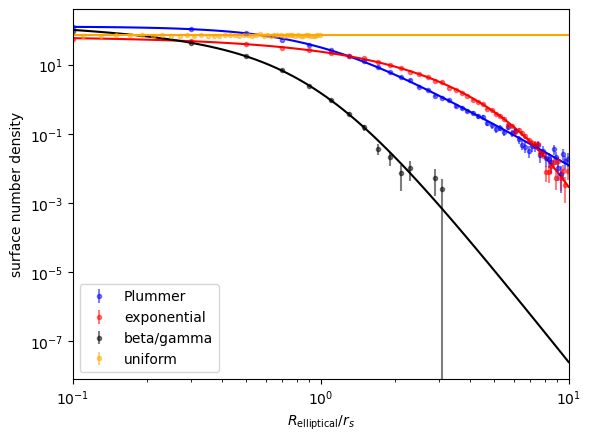

In [8]:
#plot analytic functions
x=np.logspace(-1.2,1,100)
y_plum=plum.func(x)
y_exp=exp.func(x)
y_a2bg=a2bg.func(x)
y_uni=uni.func(x)

#plot surface number density profiles from samples
plt.errorbar(plum_bin_radius,plum_bin_surface_density,yerr=plum_bin_surface_density_err,fmt='.',label='Plummer',color='b',alpha=0.5)                                                                                                                              
plt.plot(x,y_plum,color='b')

plt.errorbar(exp_bin_radius,exp_bin_surface_density,yerr=exp_bin_surface_density_err,fmt='.',label='exponential',color='r',alpha=0.5)                                                                                                                              
plt.plot(x,y_exp,color='r')                                                                                                                                     

plt.errorbar(a2bg_bin_radius,a2bg_bin_surface_density,yerr=a2bg_bin_surface_density_err,fmt='.',label='beta/gamma',color='k',alpha=0.5)                                                                                                                              
plt.plot(x,y_a2bg,color='k')                                                                                                                                     

plt.errorbar(uni_bin_radius,uni_bin_surface_density,yerr=uni_bin_surface_density_err,fmt='.',label='uniform',color='orange',alpha=0.5)                                                                                                                              
plt.plot(x,y_uni,color='orange')

plt.xscale('log')                                                                                                                                 
plt.yscale('log')   
plt.xlim([0.1,10])
plt.xlabel(r'$R_{\rm elliptical}/r_{s}$')
plt.ylabel('surface number density')
plt.legend(loc=3)
plt.show()